In [1]:
# Import Modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
import matplotlib
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)


In [2]:
def read_csv(filename):
    """
    :param filename: Name of the read csv file
    :return: The data table in the dataframe format
    """
    if os.path.exists(filename):
        df = pd.read_csv(filename)
    else:
        df = None
    return df


In [3]:
def data_deal(df):
    """
    :param df: dataframe
    :return: some plots of the data processing
    """
    # Display data info
    print("==" * 10, 'data info', "==" * 10)
    print(df.info())
    print("==" * 10, 'data head', "==" * 10)
    print(df.head())
    # Check missing values
    print("==" * 10, 'data missing value', "==" * 10)
    print(df.isnull().sum())
    # Drop all categorical variables and numeric variables that only have one value
    # Display all useful numeric variables
    numCol = df.select_dtypes(include=np.number)
    numCol = numCol.drop(['EmployeeID', 'EmployeeCount', 'StandardHours'], axis=1)
    print("==" * 10, 'data describe', "==" * 10)
    print(numCol.describe().round(3))
    # Display all categorical variables
    cagCol = df.select_dtypes(exclude=np.number)
    print("==" * 10, 'categorical variables', "==" * 10)
    print(cagCol.head())
    print("==" * 10, 'categorical variables describe', "==" * 10)
    print(cagCol.describe())
    num_count = numCol.drop(['HourlyRate', 'DailyRate', 'MonthlyIncome', 'MonthlyRate'], axis=1)
    return num_count

In [4]:
def data_visualization(num_count, df):
    """
    :param num_count: dataframe in numeric format
    :param df: dataframe, including numeric and categorical data
    :return: some tables of the data processing
    """
    plt.figure(figsize=(30, 60))
    for index, column in enumerate(num_count):
        plt.subplot(5, 4, index + 1)
        sns.countplot(data=num_count, x=column)
        plt.xticks(rotation=90)
    plt.tight_layout(pad=1.0)
    plt.show()

    plt.figure(figsize=(20, 15))

    plt.subplot(2, 2, 1)
    fig1 = df.boxplot(column='HourlyRate')
    fig1.set_title('')
    fig1.set_ylabel('count')

    plt.subplot(2, 2, 2)
    fig2 = df.boxplot(column='DailyRate')
    fig2.set_title('')
    fig2.set_ylabel('count')

    plt.subplot(2, 2, 3)
    fig3 = df.boxplot(column='MonthlyRate')
    fig3.set_title('')
    fig1.set_ylabel('count')

    plt.subplot(2, 2, 4)
    fig3 = df.boxplot(column='MonthlyIncome')
    fig3.set_title('')
    fig1.set_ylabel('count')
    plt.show()

    # Employee Attrition Per Department
    px.histogram(df, x="Department", color="Attrition", barmode="group", template="plotly_white",
                 title="Employee Attrition Per Deparment", width=600, height=600)
    # Employee Attrition Per Education Field
    px.histogram(df, x="EducationField", color="Attrition", barmode="group", template="plotly_white",
                 title="Employee Attrition Per Education Field", width=600, height=600)
    # Employee Attrition Per Education
    px.histogram(df, x="Education", color="Attrition", barmode="group", template="plotly_white",
                 title="Employee Attrition Per Education", width=500, height=500)
    # Employee Attrition Per Over Time
    px.histogram(df, x="OverTime", color="Attrition", barmode="group", template="plotly_white",
                 title="Employee Attrition Per Over Time", width=500, height=500)
    # Employee Attrition Per Work Life Balance
    px.histogram(df, x="WorkLifeBalance", color="Attrition", barmode="group", template="plotly_white",
                 title="Employee Attrition Per WorkLifeBalance", width=500, height=500)
    # Employee Attrition Per Relationship Satisfaction
    px.histogram(df, x="RelationshipSatisfaction", color="Attrition", barmode="group", template="plotly_white",
                 title="Employee Attrition Per Relationship Satisfaction", width=500, height=500)
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    plt.figure(figsize=(7, 6))
    labels = ['Female', 'Male']
    colors = ['lightpink', 'lightskyblue']
    df.groupby(df['Gender'])['Attrition'].sum().plot(kind='pie', autopct='%.2f%%', labels=labels, colors=colors)
    plt.legend()
    plt.title('The Percentage of Employee Attrition per Gender')
    plt.show()
    plt.figure(figsize=(8, 5))
    labels = ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
    df.groupby(df['PercentSalaryHike'])['Attrition'].sum().plot(kind='pie', autopct='%.2f%%', labels=labels)
    plt.title("Percent Salary Hike")
    plt.legend(loc='upper right')
    plt.tight_layout()
    # Display a heatmap to show the correlation between features
    plt.figure(figsize=(25, 25))
    sns.heatmap(num_count.corr(), cmap='RdPu', linewidths=1, annot=True, fmt='.3f')
    plt.show()
    return df


In [5]:
def object_to_numerical(df1):
    """
    :param df: dataframe
    :return: 1. feature engineering: convert object to numerical
             2. map_dict: the mapping relation of the transformation from categorical variables to numerical variables in the form of dictionary
    """
    var_mod = []
    for c in df1.columns:
        if df1[c].dtype=='object':
            var_mod.append(c)
    le = LabelEncoder()
    map_dict = {}
    for i in var_mod:
        
        df1[i] = le.fit_transform(df1[i])
        res = {}
        for cl in le.classes_:
            res.update({cl:le.transform([cl])[0]})
        map_dict[i]=res
    # After processing the data, it can be seen that all the data is numerical
    return df1, map_dict

In [7]:

def feature_engineer(X, y):
    """
    :param X: independent variable in dataframe format
    :return: 1.Normalized characteristic (independent variable) data
             2.The method of normalization
             3.Independent variable left after feature screening
    """
    
    # Feature selection
    def rmse_cv(model):
        rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 6))
        return(rmse)

    # Call LassoCV with cross validation. Default cv=10
    model_lasso = LassoCV(alphas = [0.1,1,0.001,0.0001, 0.0005]).fit(X, y)

    # alpha, the optimal regularization parameter chosen by the model
    print(model_lasso.alpha_)

    #The parameter value or weight parameter of each feature column is 0,
    # which means that the feature has been eliminated by the model
    print(model_lasso.coef_)

    #Finally, several feature vectors are selected and several feature vectors are eliminated
    coef = pd.Series(model_lasso.coef_, index = X.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    #Output the average residual in the case of the optimal regularized parameter selected, since it is 10% off, so look at the average
    print(rmse_cv(model_lasso).mean())


    #Draw the importance of the characteristic variables, and select the first three important and the last three unimportant examples
    imp_coef = pd.concat([coef.sort_values().head(3),
                         coef.sort_values().tail(3)])

    matplotlib.rcParams['figure.figsize'] = (12,5)
    imp_coef.plot(kind = "barh")
    plt.title("Coefficients in the Lasso Model")
    plt.show()
    
    rest_features=coef[coef!=0].index
    print('Lasso select features:',list(rest_features))
    
    # Data normalization
    scaler=MinMaxScaler()
    scaler_X=scaler.fit(X[rest_features])
    X=pd.DataFrame(scaler_X.transform(X[rest_features]), columns=X[rest_features].columns)
    return X, scaler_X, list(rest_features)

In [8]:
def model_predict(model, x_train, y_train, x_test):
    """
    :param model: model, such as decision tree, random forest, etc
    :param x_train: independent variable of the training model
    :param y_train: label data of the training model :param x_test: independent variable data for the model test
    :return: 1.The test result of the model against the test data
             2. The trained model
    """
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return pred, model

In [9]:
def model_evaluate(y_true, y_pred):
    """
    : paramy_true: indicates the actual test data
    : paramy_pred: Label for the test data predicted by a model
    :return: Test accuracy of the model on the test data, decimal, the maximum is 1, the minimum is 0
    """
    acc = accuracy_score(y_true, y_pred)
    mat = confusion_matrix(y_true, y_pred)
    mat = pd.DataFrame(mat, columns=['No', 'Yes'])
    mat.index = mat.columns
    plt.figure(figsize=(10, 5), dpi=100)
    sns.heatmap(mat, fmt='d', annot=True)
    plt.show()
    return acc

In [10]:
df = read_csv('watson_healthcare_modified.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
num_count = data_deal(df)
num_count.head()

==================== data info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,3,2,4,8,11,3,1,0,8,0,1,6,4,0,5
1,49,8,1,3,2,2,2,1,23,4,4,1,10,3,3,10,7,1,7
2,37,2,2,4,2,1,3,6,15,3,2,0,7,3,3,0,0,0,0
3,33,3,4,4,3,1,3,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,1,1,3,1,2,9,12,3,4,1,6,3,3,2,2,2,2


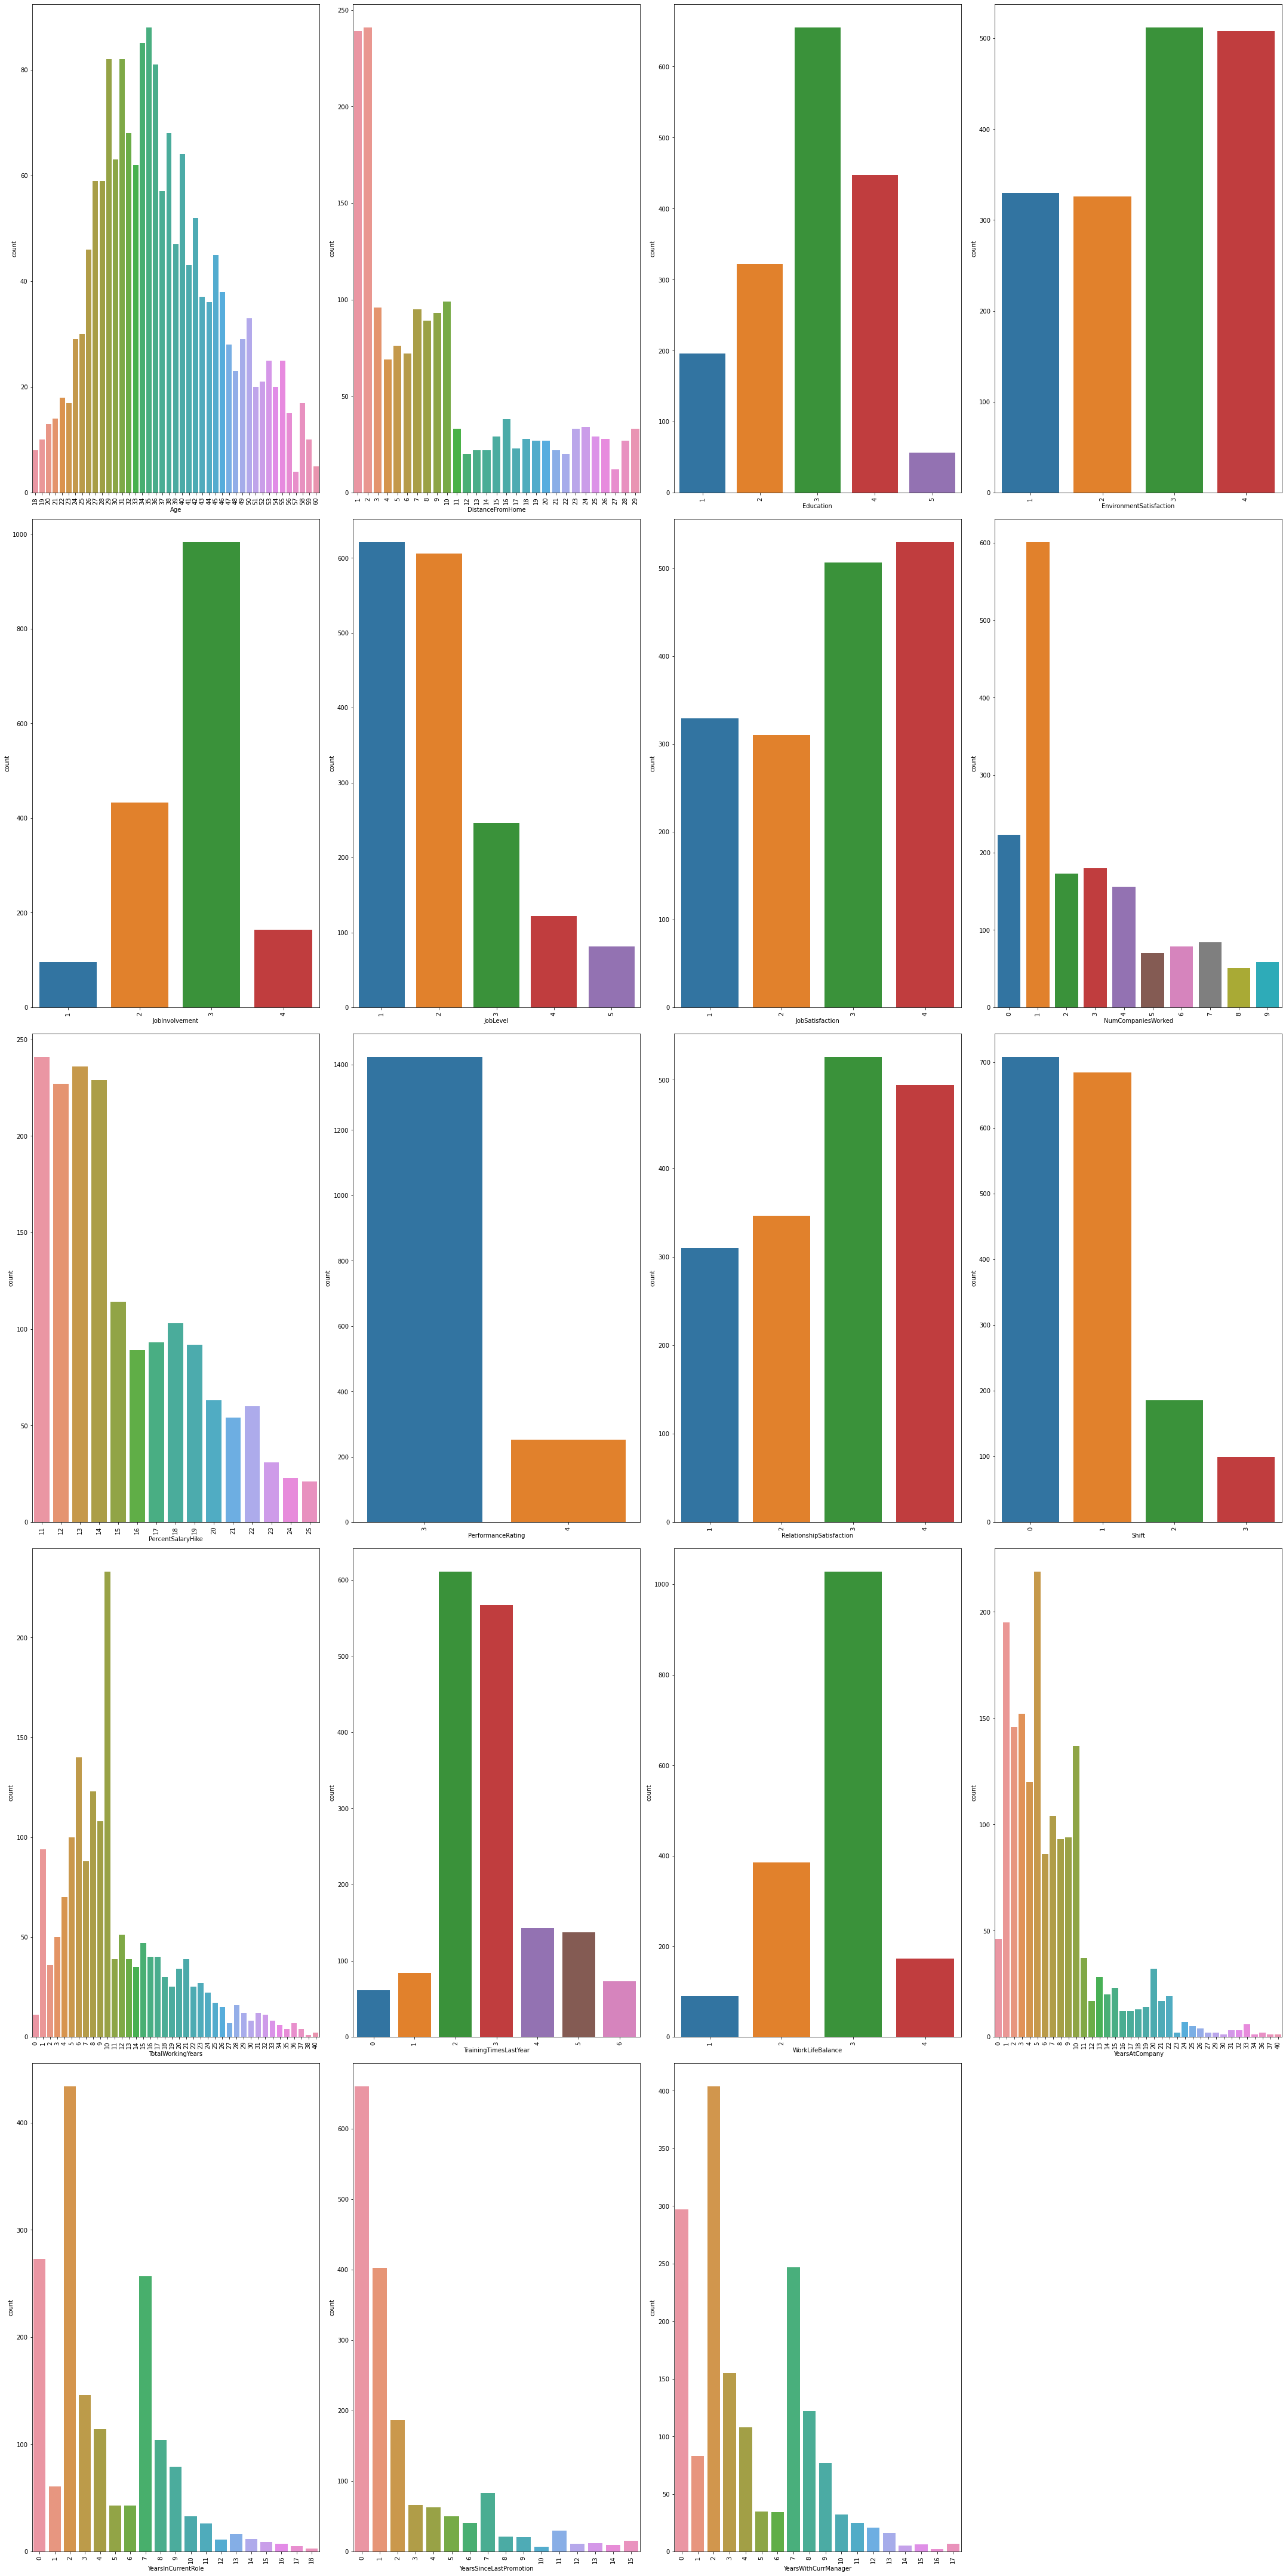

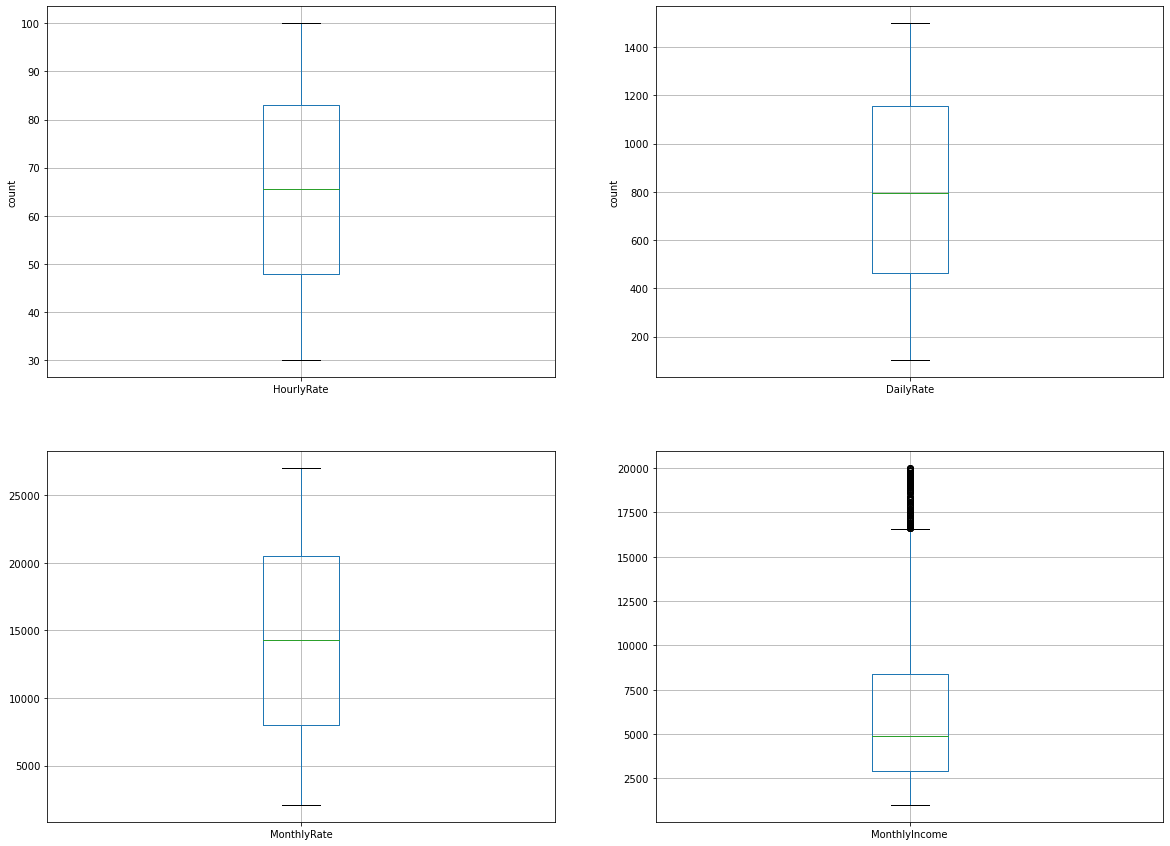

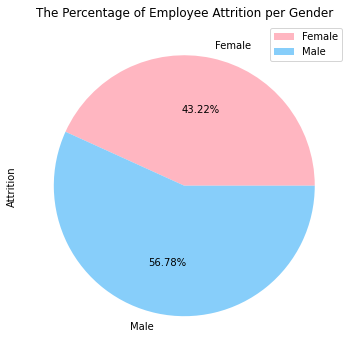

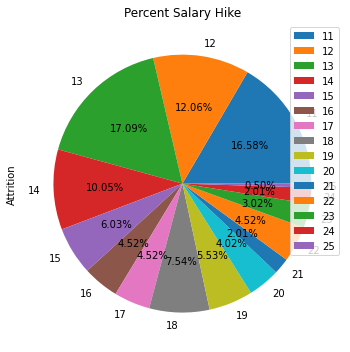

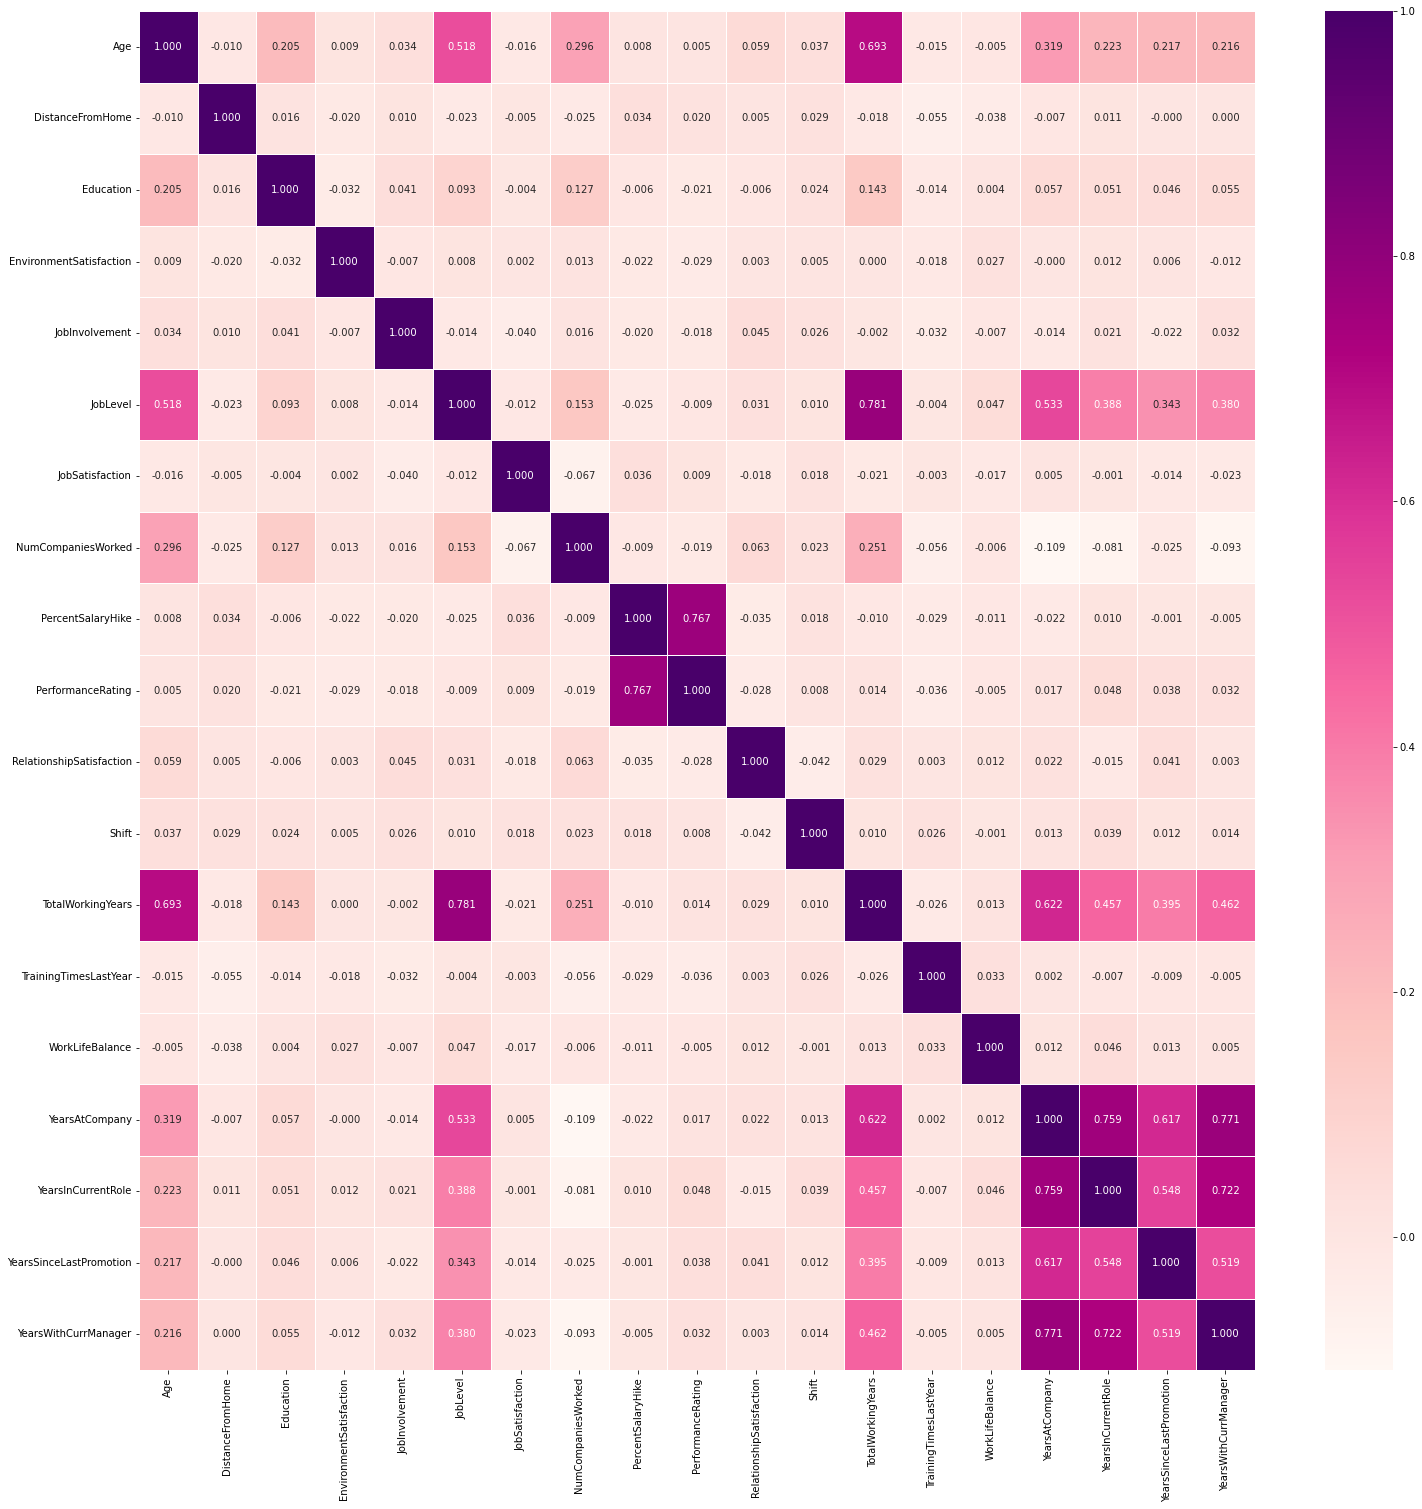

In [12]:
#%%
df1 = data_visualization(num_count, df)

In [13]:
df1.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,0,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,1,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,4,1,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,0,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,1,1,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
df2, map_dict = object_to_numerical(df1)
df2.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,2,1102,0,1,2,1,1,2,0,94,3,2,2,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,1,279,1,8,1,1,1,3,1,61,2,2,3,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,2,1373,1,2,2,4,1,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,1,1392,1,3,4,1,1,4,0,56,3,1,3,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,2,591,1,2,1,3,1,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
map_dict

{'BusinessTravel': {'Non-Travel': 0,
  'Travel_Frequently': 1,
  'Travel_Rarely': 2},
 'Department': {'Cardiology': 0, 'Maternity': 1, 'Neurology': 2},
 'EducationField': {'Human Resources': 0,
  'Life Sciences': 1,
  'Marketing': 2,
  'Medical': 3,
  'Other': 4,
  'Technical Degree': 5},
 'JobRole': {'Admin': 0,
  'Administrative': 1,
  'Nurse': 2,
  'Other': 3,
  'Therapist': 4},
 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
 'Over18': {'Y': 0},
 'OverTime': {'No': 0, 'Yes': 1}}

0.001
[-6.32438356e-03 -1.19898799e-02 -2.46743536e-05 -6.90049003e-03
  3.40575776e-03  2.84166573e-03 -3.85914352e-03  0.00000000e+00
 -3.56236367e-02 -4.68364893e-03 -5.66029329e-04 -6.38038181e-02
 -1.50309379e-02 -1.38474696e-02 -2.81338669e-02  4.78038077e-02
  4.13794851e-07  1.49769654e-06  1.17155027e-02  0.00000000e+00
  2.44465452e-01 -2.49675365e-04  0.00000000e+00 -8.46902033e-03
  0.00000000e+00 -2.71710436e-02 -2.76558995e-03 -6.12654367e-03
 -3.14245476e-02  5.49561480e-04 -7.27269090e-03  7.84272376e-03
 -6.94376890e-03]
Lasso picked 29 variables and eliminated the other 4 variables
0.2732519394017529


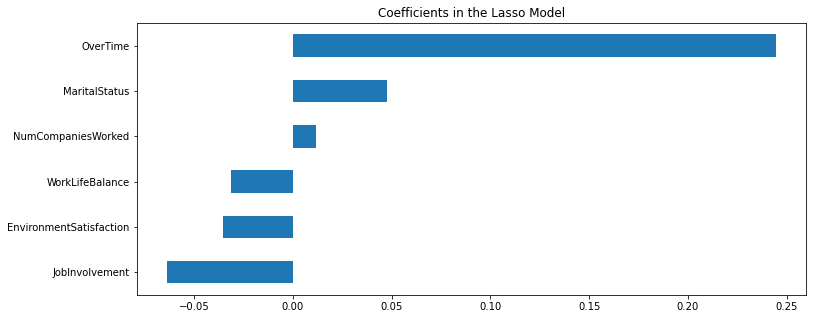

Lasso select features: ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,0.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,0.666667,0.25,0.50,1.000000,1.0,0.262454,0.698053,0.888889,1.0,0.000000,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,0.333333,0.25,0.75,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.857143,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,0.333333,0.00,0.50,0.666667,1.0,0.056925,0.012126,0.666667,1.0,0.285714,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,0.666667,0.00,0.75,0.666667,0.5,0.100053,0.845814,0.111111,1.0,0.000000,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,0.666667,0.00,0.50,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.071429,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [16]:
X, y = df2.drop(['Attrition','EmployeeID'], axis=1), df2['Attrition']
scaler_X, scaler_method, features = feature_engineer(X, y)
scaler_X.head()

In [17]:
x_train,x_test, y_train, y_test = train_test_split(scaler_X, y, test_size=0.25, random_state=233)

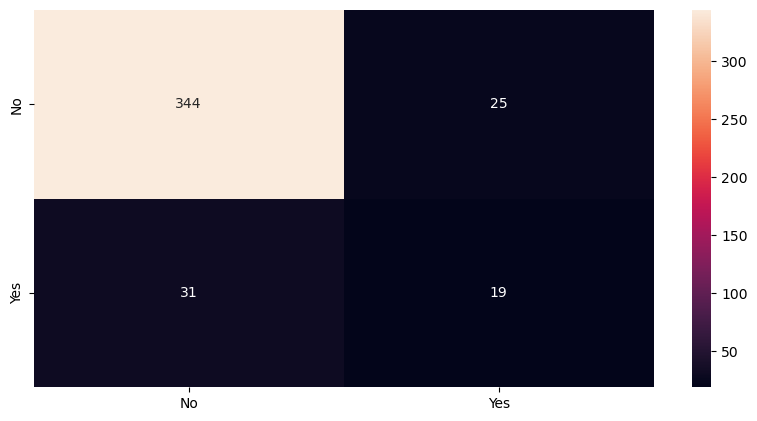

tree accuracy: 0.8663484486873508


In [18]:
# decision tree
tree = DecisionTreeClassifier()
tree_pred, tree_model = model_predict(tree, x_train, y_train, x_test)
tree_acc = model_evaluate(y_test, tree_pred)
print("tree accuracy:", tree_acc)

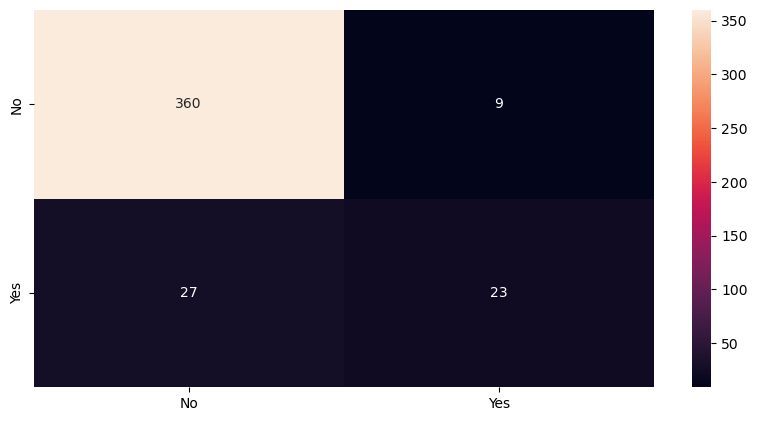

logistic accuracy: 0.9140811455847255


In [19]:
# logistic
logistic = LogisticRegression()
logistic_pred, log_model = model_predict(logistic, x_train, y_train, x_test)
logistic_acc = model_evaluate(y_test, logistic_pred)
print("logistic accuracy:", logistic_acc)

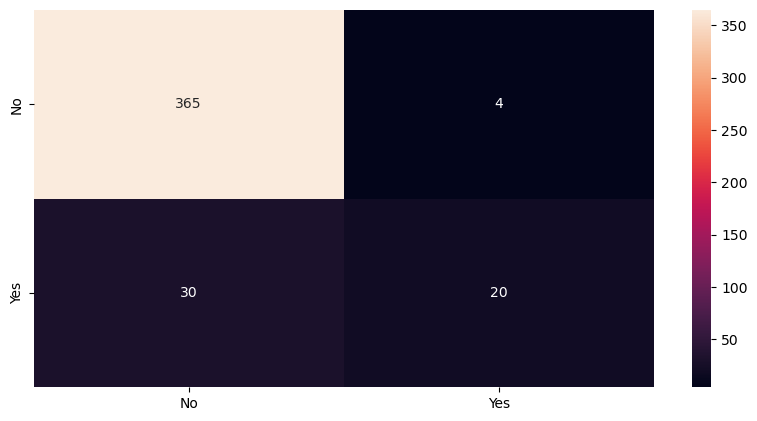

rfc accuracy: 0.918854415274463


In [20]:
# random forest
rfc = RandomForestClassifier(n_estimators=800, random_state=1)
rfc_pred, rfc_model = model_predict(rfc, x_train, y_train, x_test)
rfc_acc = model_evaluate(y_test, rfc_pred)
print("rfc accuracy:", rfc_acc)

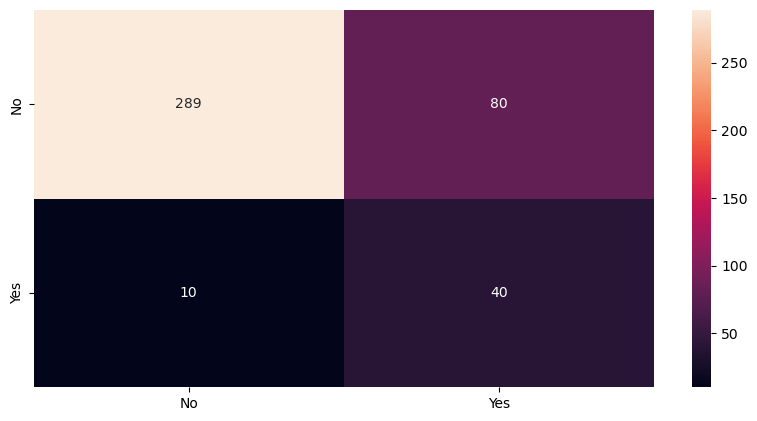

bayes accuracy: 0.7852028639618138


In [21]:
#bayes
bayes = GaussianNB()
bayes_pred, bayes_model = model_predict(bayes, x_train, y_train, x_test)
bayes_acc = model_evaluate(y_test, bayes_pred)
print("bayes accuracy:", bayes_acc)

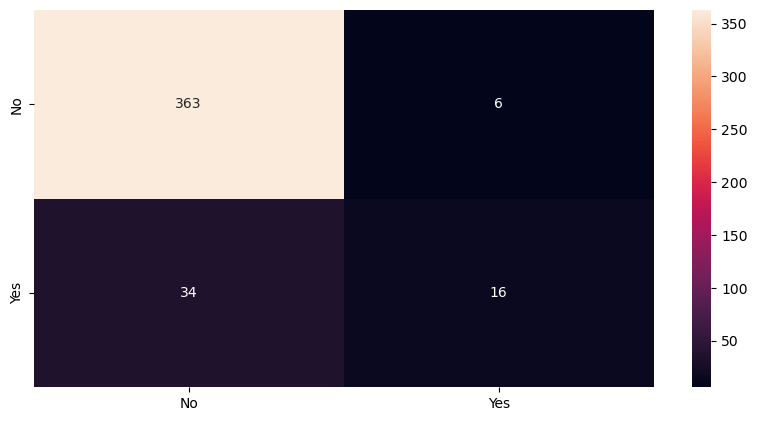

svm accuracy: 0.9045346062052506


In [22]:
# SVM
svm = SVC()
svm_pred, svm_model = model_predict(svm, x_train, y_train, x_test)
svm_acc = model_evaluate(y_test, svm_pred)
print("svm accuracy:", svm_acc)

In [23]:
# predict single item
import warnings
warnings.filterwarnings("ignore")
print("Please enter the following characteristic data:")
print(features)
test_array = [35, 2, 809, 1, 16, 3, 3, 1, 1, 84, 4, 1, 2, 2, 1, 2426, 16479, 0, 0, 13, 3, 1, 6, 5, 3, 5, 4, 0, 3]
scaler_sample = scaler_method.transform(np.array(test_array).reshape(1,-1))
predict_label = rfc_model.predict(scaler_sample)
print("predict label:", predict_label[0])

Please enter the following characteristic data:
['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
predict label: 0


In [24]:
print(list(df.iloc[10,:][features]))

[35, 2, 809, 1, 16, 3, 3, 1, 1, 84, 4, 1, 2, 2, 1, 2426, 16479, 0, 0, 13, 3, 1, 6, 5, 3, 5, 4, 0, 3]


In [25]:
df['Attrition'][10]

0